# Use CNN to detect breast cancer 

In [1]:
# General packages
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import random

from matplotlib.image import imread
import cv2

# Packages for ML
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
# from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D


In [2]:
fd = '../ECE 228/archive/IDC_regular_ps50_idx5'

imagePatches = glob(fd + '/**/*.png', recursive=True)
for filename in imagePatches[0:5]:
    print(filename)

../ECE 228/archive/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1051_y2401_class0.png
../ECE 228/archive/IDC_regular_ps50_idx5/9036/0/9036_idx5_x2951_y951_class0.png
../ECE 228/archive/IDC_regular_ps50_idx5/9036/0/9036_idx5_x3001_y1451_class0.png
../ECE 228/archive/IDC_regular_ps50_idx5/9036/0/9036_idx5_x3051_y801_class0.png
../ECE 228/archive/IDC_regular_ps50_idx5/9036/0/9036_idx5_x951_y1901_class0.png


In [3]:
len(imagePatches)

277524

In [4]:
# bin the data to cancer and no cancer

class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

display('Size of the class 0 = ',len(class0))
display('Size of the class 1 = ',len(class1))

'Size of the class 0 = '

198738

'Size of the class 1 = '

78786

In [5]:
# randomly select 1000 images from each class

num_sample_selected = 10000
rand_sample_class0 = random.sample(class0, num_sample_selected)
rand_sample_class1 = random.sample(class1, num_sample_selected)


In [6]:
def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = imread(i )
            img_sized = cv2.resize(img, (64, 64), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

In [7]:
class0_array = get_image_arrays(rand_sample_class0, 0)
class1_array = get_image_arrays(rand_sample_class1, 1)

In [8]:
len(class0_array)

10000

(50, 50, 3)

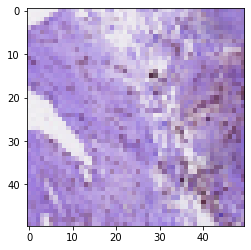

In [9]:
test = cv2.imread(fd + '/13689/1/13689_idx5_x801_y1501_class1.png' ,cv2.IMREAD_COLOR)
plt.imshow(test)

display(test.shape)

In [10]:
combined_data = np.concatenate((class0_array, class1_array))
random.seed(10)
random.shuffle(combined_data)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [11]:
combined_data.shape

(20000, 2)

In [12]:
X = []
y = []

for i in range(combined_data.shape[0]):
    X.append(combined_data[i][0])
    y.append(combined_data[i][1])



In [13]:
X = np.array(X).reshape(-1, 64, 64, 3)

In [14]:
print(torch.cuda.is_available())

False


In [15]:
X.shape

(20000, 64, 64, 3)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15000, 64, 64, 3) (5000, 64, 64, 3) (15000, 2) (5000, 2)


In [17]:
def create_model():        
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size=3, activation='relu', input_shape=(64,64,3)))
    model.add(Conv2D(filters = 16, kernel_size=3, activation='relu'))
    #model.add(Conv2D(filters = 16, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(2, activation="softmax"))
    adam = Adam(learning_rate=0.001)
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])   
    #model.compile(loss="MeanSquaredError", optimizer=adam, metrics=['accuracy'])     


    return model

In [18]:
model = create_model()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs= 30,
    verbose = 2,
)

Epoch 1/30


2022-05-08 18:56:20.829127: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


469/469 - 23s - loss: 0.3540 - accuracy: 0.8505 - val_loss: 0.3126 - val_accuracy: 0.8488 - 23s/epoch - 50ms/step
Epoch 2/30
469/469 - 23s - loss: 0.3090 - accuracy: 0.8671 - val_loss: 0.3037 - val_accuracy: 0.8702 - 23s/epoch - 49ms/step
Epoch 3/30
469/469 - 23s - loss: 0.2954 - accuracy: 0.8795 - val_loss: 0.2953 - val_accuracy: 0.8766 - 23s/epoch - 49ms/step
Epoch 4/30
469/469 - 23s - loss: 0.2898 - accuracy: 0.8861 - val_loss: 0.3060 - val_accuracy: 0.8812 - 23s/epoch - 49ms/step
Epoch 5/30
469/469 - 23s - loss: 0.2734 - accuracy: 0.8917 - val_loss: 0.2939 - val_accuracy: 0.8848 - 23s/epoch - 49ms/step
Epoch 6/30
469/469 - 23s - loss: 0.2584 - accuracy: 0.9003 - val_loss: 0.2946 - val_accuracy: 0.8886 - 23s/epoch - 49ms/step
Epoch 7/30
469/469 - 23s - loss: 0.2463 - accuracy: 0.9063 - val_loss: 0.3128 - val_accuracy: 0.8858 - 23s/epoch - 49ms/step
Epoch 8/30
469/469 - 23s - loss: 0.2180 - accuracy: 0.9187 - val_loss: 0.2887 - val_accuracy: 0.8950 - 23s/epoch - 49ms/step
Epoch 9/30


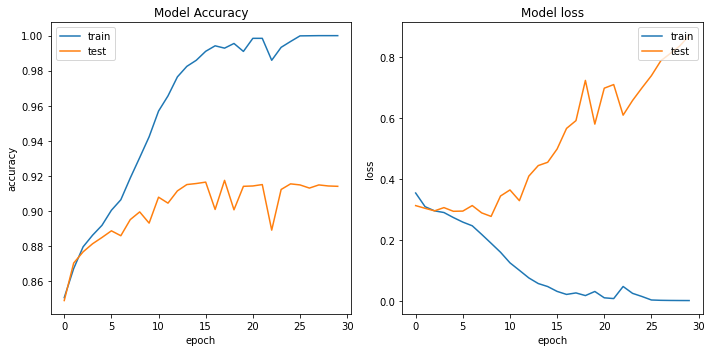

In [21]:
fig, axs = plt.subplots(1,3,figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

fig.tight_layout()
plt.show()

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])